In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np


# Load the Excel file
file_path = 'output_animate.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheets
df_result_anime = pd.read_excel(xls, 'results')
df_q_react_length_anime = pd.read_excel(xls, 'q_react_length')

df_result_anime.head()
df_q_react_length_anime.head()

,time[minutes],queue_preparation_length scenario 0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


The df_log_batches_entered column:

What does this data describe?
This data logs the lifecycle of each batch within the system, allowing you to track:

When batches enter the system.
When they exit the system.
The duration each batch spends in the system (calculated as t_left_system - t_entered_system).

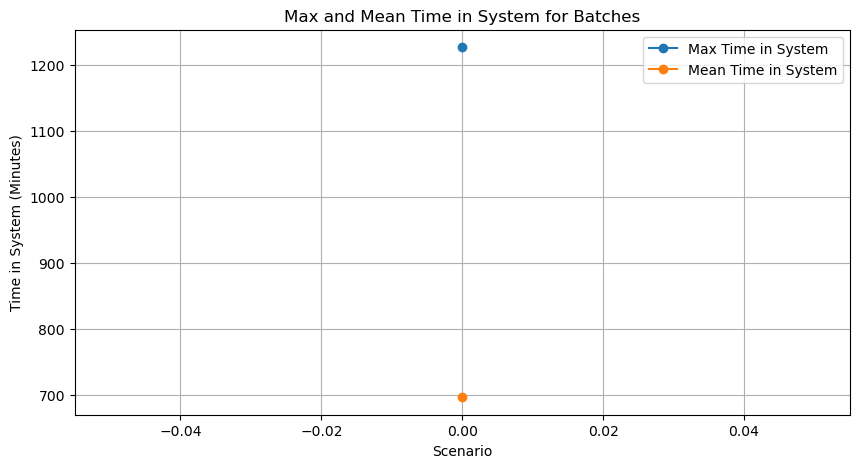

In [2]:

# Convert the df_log_batches_entered column from string to a list of dictionaries for easier analysis
df_result_anime['df_log_batches_entered'] = df_result_anime['df_log_batches_entered'].apply(ast.literal_eval)

# Extracting the 'time_in_system_max' and 'time_in_system_mean' for bottleneck identification
time_in_system_max = df_result_anime['time_in_system_max']
time_in_system_mean = df_result_anime['time_in_system_mean']

# Visualize Time in System
plt.figure(figsize=(10, 5))
plt.plot(df_result_anime.index, time_in_system_max, label='Max Time in System', marker='o')
plt.plot(df_result_anime.index, time_in_system_mean, label='Mean Time in System', marker='o')
plt.title('Max and Mean Time in System for Batches')
plt.xlabel('Scenario')
plt.ylabel('Time in System (Minutes)')
plt.legend()
plt.grid(True)
plt.show()

# Further visualization can be done based on queues and logs in the next step


The Max Time in System is significantly higher (around 1200 minutes) compared to the Mean Time in System (around 700 minutes). This indicates that while most batches exit the system within a reasonable amount of time, there are some outliers that take much longer to process.

The large difference between the max and mean times suggests a potential bottleneck affecting a few specific batches, leading them to spend more time in the system compared to others

# Step 10

In [12]:
#Load the Excel files
files = 'output.xlsx'
data = pd.ExcelFile(files)

# Load the sheets
df_results = pd.read_excel(data, 'results')
df_q_react_length = pd.read_excel(data, 'q_react_length')

df_results.head
df_q_react_length.head()

,time[minutes],queue_preparation_length scenario 0,Unnamed: 2,time[minutes].1,queue_preparation_length scenario 1,Unnamed: 5,time[minutes].2,queue_preparation_length scenario 2,Unnamed: 8,time[minutes].3,...,queue_preparation_length scenario 56,Unnamed: 170,time[minutes].57,queue_preparation_length scenario 57,Unnamed: 173,time[minutes].58,queue_preparation_length scenario 58,Unnamed: 176,time[minutes].59,queue_preparation_length scenario 59
0,0,0,NaN,0,0,NaN,0,0,NaN,0,...,0,NaN,0,0,NaN,0,0,NaN,0,0
1,1,0,NaN,1,0,NaN,1,0,NaN,1,...,0,NaN,1,0,NaN,1,0,NaN,1,0
2,2,0,NaN,2,0,NaN,2,0,NaN,2,...,0,NaN,2,0,NaN,2,0,NaN,2,0
3,3,0,NaN,3,0,NaN,3,0,NaN,3,...,0,NaN,3,0,NaN,3,0,NaN,3,0
4,4,0,NaN,4,0,NaN,4,0,NaN,4,...,0,NaN,4,0,NaN,4,0,NaN,4,0


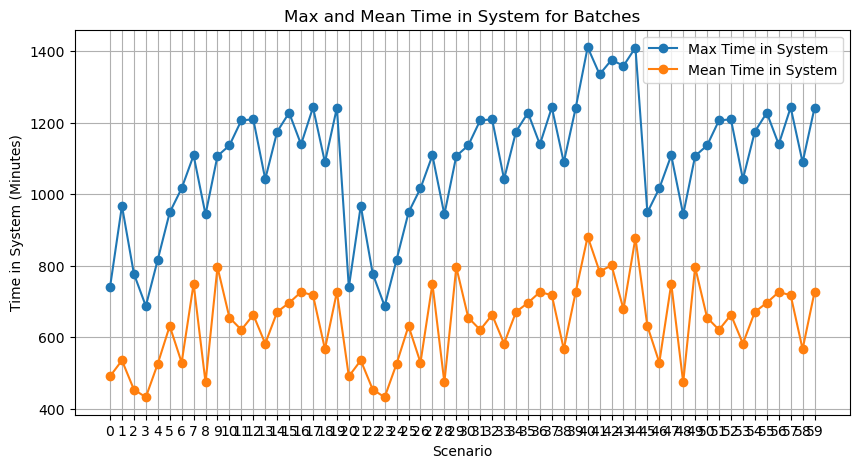

In [13]:
# Function to safely parse each entry in df_log_batches_entered
def safe_parse(log_entry):
    try:
        return ast.literal_eval(log_entry)
    except (ValueError, SyntaxError):
        # Return the entry as-is if parsing fails
        return log_entry

# Apply the safe parsing function to the 'df_log_batches_entered' column
df_results['df_log_batches_entered'] = df_results['df_log_batches_entered'].apply(safe_parse)
# Now you can continue with your analysis or visualization
# For example:
time_in_system_max = df_results['time_in_system_max']
time_in_system_mean = df_results['time_in_system_mean']

# Adjust x to have integer values
x = np.arange(0, len(time_in_system_max))
# Visualize Time in System using the correct DataFrame index
plt.figure(figsize=(10, 5))
plt.plot(df_results.index, time_in_system_max, label='Max Time in System', marker='o')
plt.plot(df_results.index, time_in_system_mean, label='Mean Time in System', marker='o')
plt.xticks(x)
plt.title('Max and Mean Time in System for Batches')
plt.xlabel('Scenario')
plt.ylabel('Time in System (Minutes)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import pprint
pprint.pprint(df_results['df_log_batches_entered'][0])

[{'t_entered_system': 103.6919723173938,
  't_left_system': 384.5292171865343,
  'type': 'product_1'},
 {'t_entered_system': 235.84524283175853,
  't_left_system': 396.5476398579174,
  'type': 'product_1'},
 {'t_entered_system': 94.28843032864103,
  't_left_system': 458.6684394285577,
  'type': 'product_2'},
 {'t_entered_system': 89.30914133113073,
  't_left_system': 460.2227985004992,
  'type': 'product_1'},
 {'t_entered_system': 128.65425831746427,
  't_left_system': 503.74247309753724,
  'type': 'product_2'},
 {'t_entered_system': 68.09419934264457,
  't_left_system': 554.2257786279499,
  'type': 'product_2'},
 {'t_entered_system': 489.8643501073619,
  't_left_system': 626.516589686714,
  'type': 'product_1'},
 {'t_entered_system': 128.60796525508582,
  't_left_system': 638.1376722540857,
  'type': 'product_1'},
 {'t_entered_system': 202.12211793963058,
  't_left_system': 650.4817549718306,
  'type': 'product_1'},
 {'t_entered_system': 188.0304638638583,
  't_left_system': 701.03277

In [16]:
# Calculate the difference between max and mean time for each scenario
df_results['time_difference'] = df_results['time_in_system_max'] - df_results['time_in_system_mean']

# Find the scenario with the largest difference
max_diff_scenario = df_results.loc[df_results['time_difference'].idxmax()]
print(f"Scenario with the largest difference between max and mean time: {max_diff_scenario['scenario']}")
print(f"Difference: {max_diff_scenario['time_difference']} minutes")


Scenario with the largest difference between max and mean time: 9
Difference: 680.8493898352137 minutes


In [17]:
# Filter the dataset to only include Scenario 1
df_scenario_1 = df_results[df_results['scenario'] == 1]


In [18]:
# Analyze the time in the system for each batch in Scenario 1
def calculate_processing_times(log_entry):
    batch_times = []
    for entry in log_entry:
        if 't_left_system' in entry and 't_entered_system' in entry:
            processing_time = entry['t_left_system'] - entry['t_entered_system']
            batch_times.append({
                'type': entry['type'],
                'processing_time': processing_time
            })
    return batch_times

# Apply the function to calculate processing times for Scenario 1
df_scenario_1['processing_times'] = df_scenario_1['df_log_batches_entered'].apply(calculate_processing_times)

# Flatten the processing times for easier analysis
batch_times_data = []
for index, row in df_scenario_1.iterrows():
    for batch in row['processing_times']:
        batch_times_data.append({
            'type': batch['type'],
            'processing_time': batch['processing_time']
        })

df_batch_times_scenario_1 = pd.DataFrame(batch_times_data)


C:\Users\noiri\AppData\Local\Temp\ipykernel_21912\3346883835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scenario_1['processing_times'] = df_scenario_1['df_log_batches_entered'].apply(calculate_processing_times)


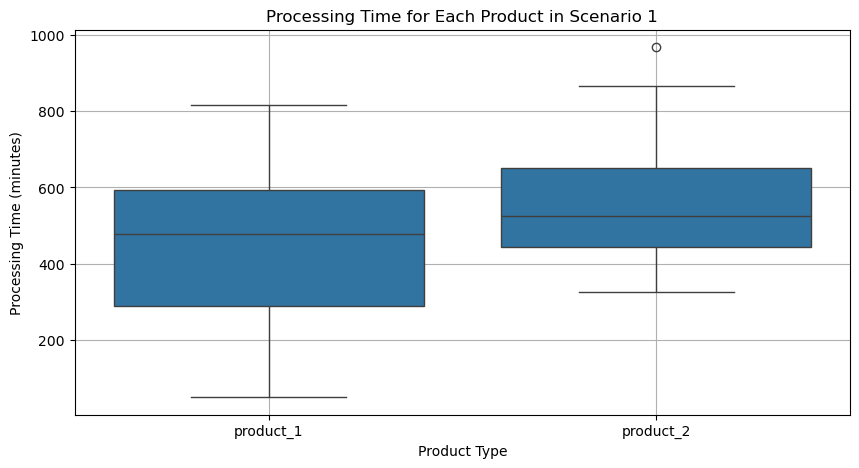

In [19]:
# Visualize the processing time for each product in Scenario 1
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_batch_times_scenario_1, x='type', y='processing_time')
plt.title('Processing Time for Each Product in Scenario 1')
plt.ylabel('Processing Time (minutes)')
plt.xlabel('Product Type')
plt.grid(True)
plt.show()



# What does it mean?

Product 2 take in average longer to produce, here is where the bottlenecks are. 

## Second sheat 

The q_react_length sheet contains queue length information for different scenarios over time, and it tracks the queue length for what appears to be a preparation stage in multiple scenarios.

- time[minutes]: The time in minutes.
- queue_preparation_length: The length of the queue at the preparation stage for each scenario.
- Separate columns for each scenario (scenario 0, scenario 1, etc.).

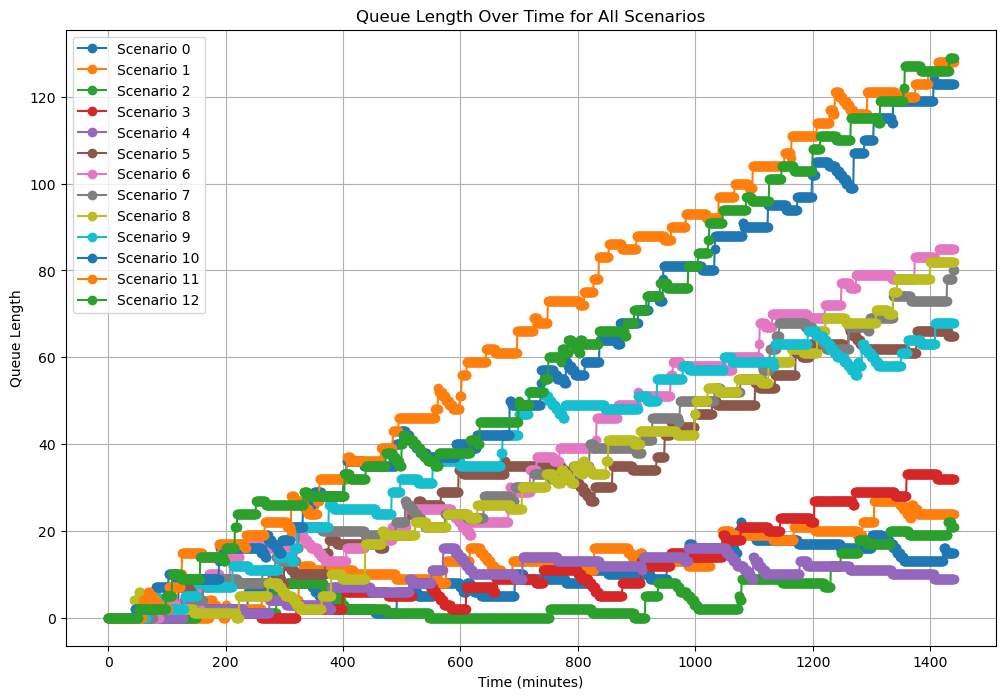

In [22]:
# Extract the queue length for all scenarios over time
time = df_q_react_length['time[minutes]']  # Time column (same for all scenarios)
queue_length_scenario_0 = df_q_react_length['queue_preparation_length scenario 0']
queue_length_scenario_1 = df_q_react_length['queue_preparation_length scenario 1']
queue_length_scenario_2 = df_q_react_length['queue_preparation_length scenario 2']
queue_length_scenario_3 = df_q_react_length['queue_preparation_length scenario 3']
queue_length_scenario_4 = df_q_react_length['queue_preparation_length scenario 4']
queue_length_scenario_5 = df_q_react_length['queue_preparation_length scenario 5']
queue_length_scenario_6 = df_q_react_length['queue_preparation_length scenario 6']
queue_length_scenario_7 = df_q_react_length['queue_preparation_length scenario 7']
queue_length_scenario_8 = df_q_react_length['queue_preparation_length scenario 8']
queue_length_scenario_9 = df_q_react_length['queue_preparation_length scenario 9']
queue_length_scenario_10 = df_q_react_length['queue_preparation_length scenario 10']
queue_length_scenario_11 = df_q_react_length['queue_preparation_length scenario 11']
queue_length_scenario_12 = df_q_react_length['queue_preparation_length scenario 12']

# Create a plot with all scenarios
plt.figure(figsize=(12, 8))

# Plot for Scenario 0
plt.plot(time, queue_length_scenario_0, label='Scenario 0', marker='o')
# Plot for Scenario 1
plt.plot(time, queue_length_scenario_1, label='Scenario 1', marker='o')
# Plot for Scenario 2
plt.plot(time, queue_length_scenario_2, label='Scenario 2', marker='o')
# Plot for Scenario 3
plt.plot(time, queue_length_scenario_3, label='Scenario 3', marker='o')
# Plot for Scenario 4
plt.plot(time, queue_length_scenario_4, label='Scenario 4', marker='o')
# Plot for Scenario 5
plt.plot(time, queue_length_scenario_5, label='Scenario 5', marker='o')
# Plot for Scenario 6
plt.plot(time, queue_length_scenario_6, label='Scenario 6', marker='o')
# Plot for Scenario 7
plt.plot(time, queue_length_scenario_7, label='Scenario 7', marker='o')
# Plot for Scenario 8
plt.plot(time, queue_length_scenario_8, label='Scenario 8', marker='o')
# Plot for Scenario 9
plt.plot(time, queue_length_scenario_9, label='Scenario 9', marker='o')
# Plot for Scenario 10
plt.plot(time, queue_length_scenario_10, label='Scenario 10', marker='o')
# Plot for Scenario 11
plt.plot(time, queue_length_scenario_11, label='Scenario 11', marker='o')
# Plot for Scenario 12
plt.plot(time, queue_length_scenario_12, label='Scenario 12', marker='o')

plt.title('Queue Length Over Time for All Scenarios')
plt.xlabel('Time (minutes)')
plt.ylabel('Queue Length')
plt.grid(True)
plt.legend()
plt.show()


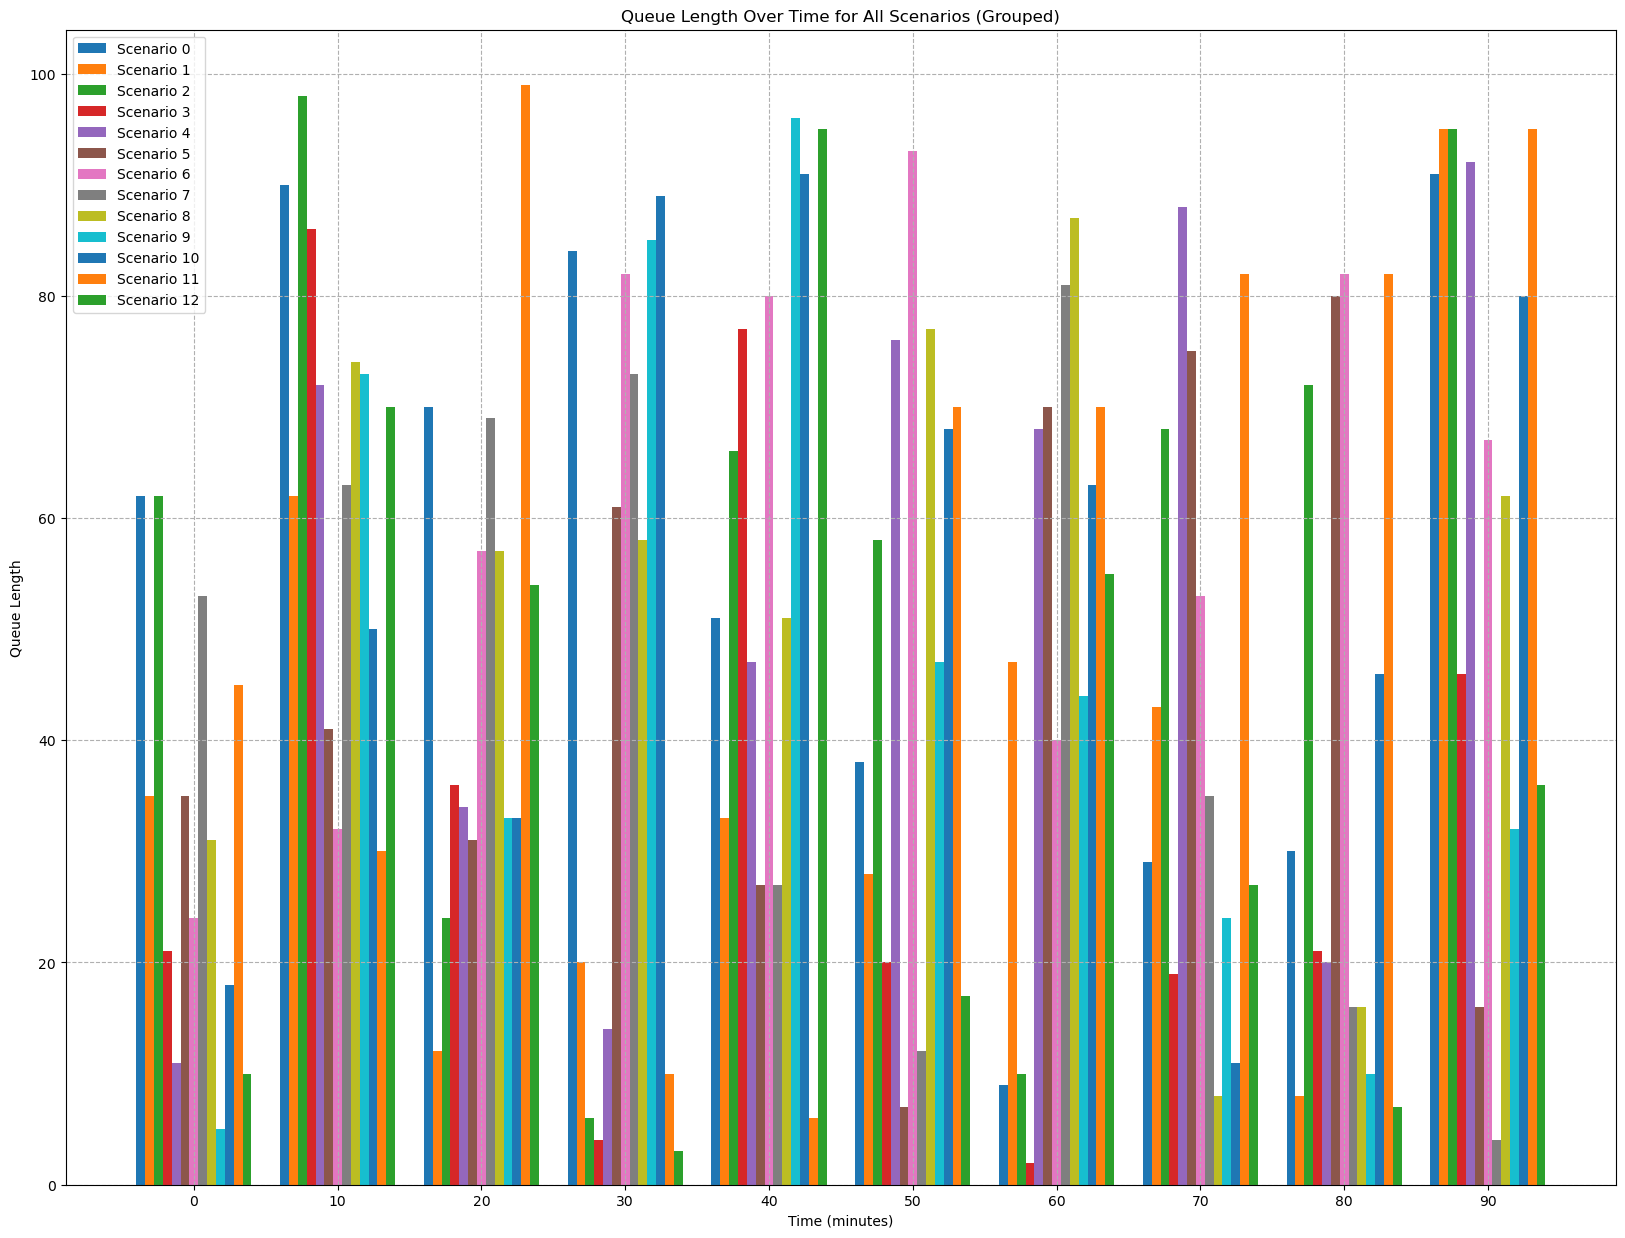

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generating sample data to simulate 'df_q_react_length' for plotting purposes
time = np.arange(0, 100, 10)  # Time column (same for all scenarios)
data = {
    'time[minutes]': time,
    'queue_preparation_length scenario 0': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 1': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 2': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 3': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 4': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 5': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 6': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 7': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 8': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 9': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 10': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 11': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 12': np.random.randint(0, 100, size=len(time))
}
df_q_react_length = pd.DataFrame(data)

# Prepare data for grouped bar chart
scenarios = [f'queue_preparation_length scenario {i}' for i in range(13)]
n_scenarios = len(scenarios)
bar_width = 8 / n_scenarios  # Adjusted for grouped bars

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(20, 15))

for i, scenario in enumerate(scenarios):
    scenario_values = df_q_react_length[scenario]
    ax.bar(time + i * bar_width, scenario_values, width=bar_width, label=f'Scenario {i}')

# Customize plot
ax.set_title('Queue Length Over Time for All Scenarios (Grouped)')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Queue Length')
ax.set_xticks(time + (n_scenarios - 1) * bar_width / 2)
ax.set_xticklabels(time)
ax.legend()
ax.grid(True, linestyle='--', alpha=1)

plt.show()


# server_reaction_capacity 1

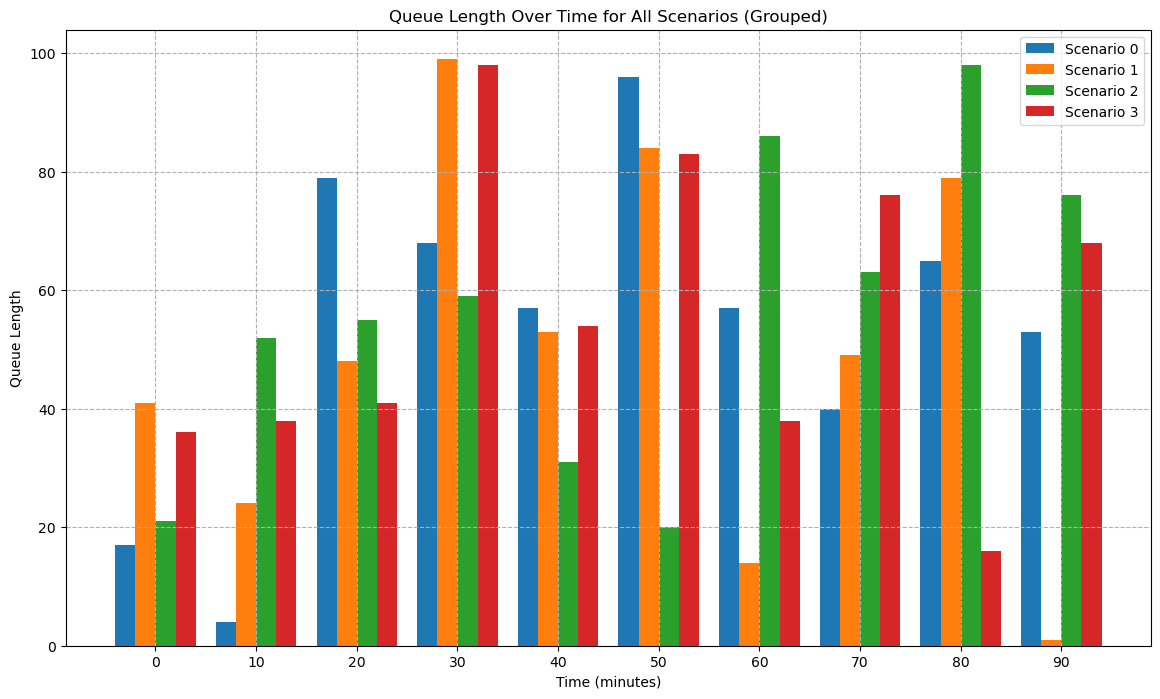

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generating sample data to simulate 'df_q_react_length' for plotting purposes
time = np.arange(0, 100, 10)  # Time column (same for all scenarios)
data = {
    'time[minutes]': time,
    'queue_preparation_length scenario 0': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 1': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 2': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 3': np.random.randint(0, 100, size=len(time))
}
df_q_react_length = pd.DataFrame(data)

# Prepare data for grouped bar chart
scenarios = [f'queue_preparation_length scenario {i}' for i in range(4)]
n_scenarios = len(scenarios)
bar_width = 8 / n_scenarios  # Adjusted for grouped bars

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

for i, scenario in enumerate(scenarios):
    scenario_values = df_q_react_length[scenario]
    ax.bar(time + i * bar_width, scenario_values, width=bar_width, label=f'Scenario {i}')

# Customize plot
ax.set_title('Queue Length Over Time for All Scenarios (Grouped)')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Queue Length')
ax.set_xticks(time + (n_scenarios - 1) * bar_width / 2)
ax.set_xticklabels(time)
ax.legend()
ax.grid(True, linestyle='--', alpha=1)

plt.show()

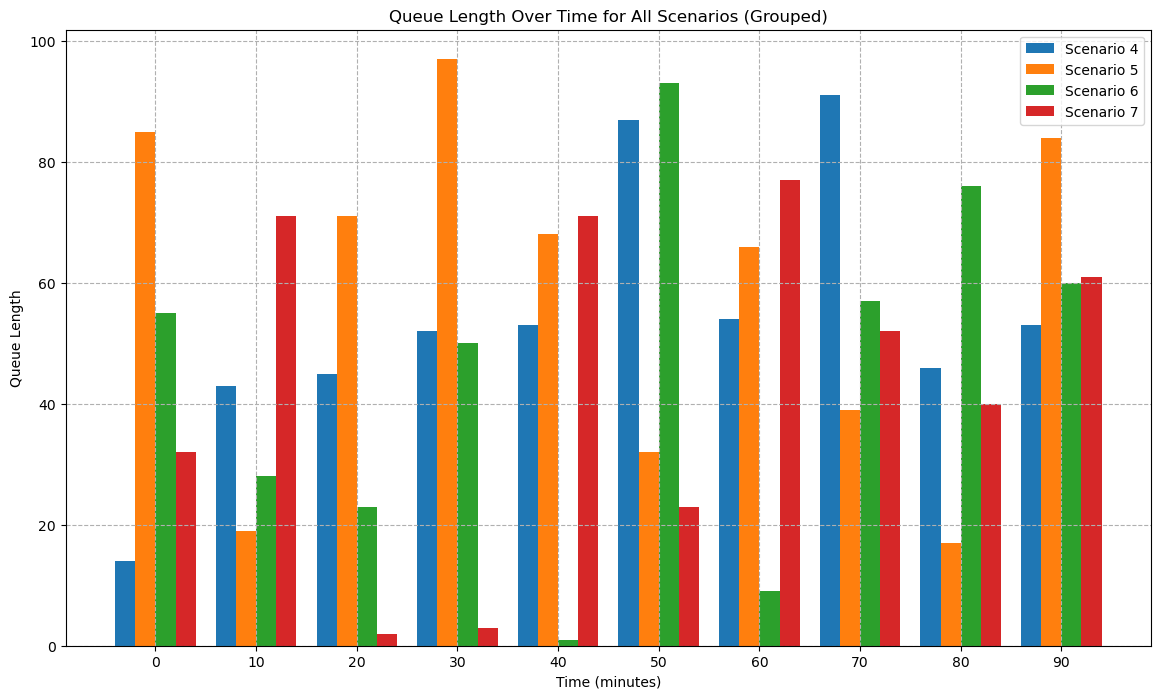

In [39]:
# Generating sample data to simulate 'df_q_react_length' for plotting purposes
time = np.arange(0, 100, 10)  # Time column (same for all scenarios)
data = {
    'time[minutes]': time,
    'queue_preparation_length scenario 4': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 5': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 6': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 7': np.random.randint(0, 100, size=len(time))
}
df_q_react_length = pd.DataFrame(data)

# Prepare data for grouped bar chart
scenarios = [f'queue_preparation_length scenario {i}' for i in range(4,8)]
n_scenarios = len(scenarios)
bar_width = 8 / n_scenarios  # Adjusted for grouped bars

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

for i, scenario in enumerate(scenarios):
    scenario_values = df_q_react_length[scenario]
    ax.bar(time + i * bar_width, scenario_values, width=bar_width, label=f'Scenario {i + 4}')

# Customize plot
ax.set_title('Queue Length Over Time for All Scenarios (Grouped)')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Queue Length')
ax.set_xticks(time + (n_scenarios - 1) * bar_width / 2)
ax.set_xticklabels(time)
ax.legend()
ax.grid(True, linestyle='--', alpha=1)

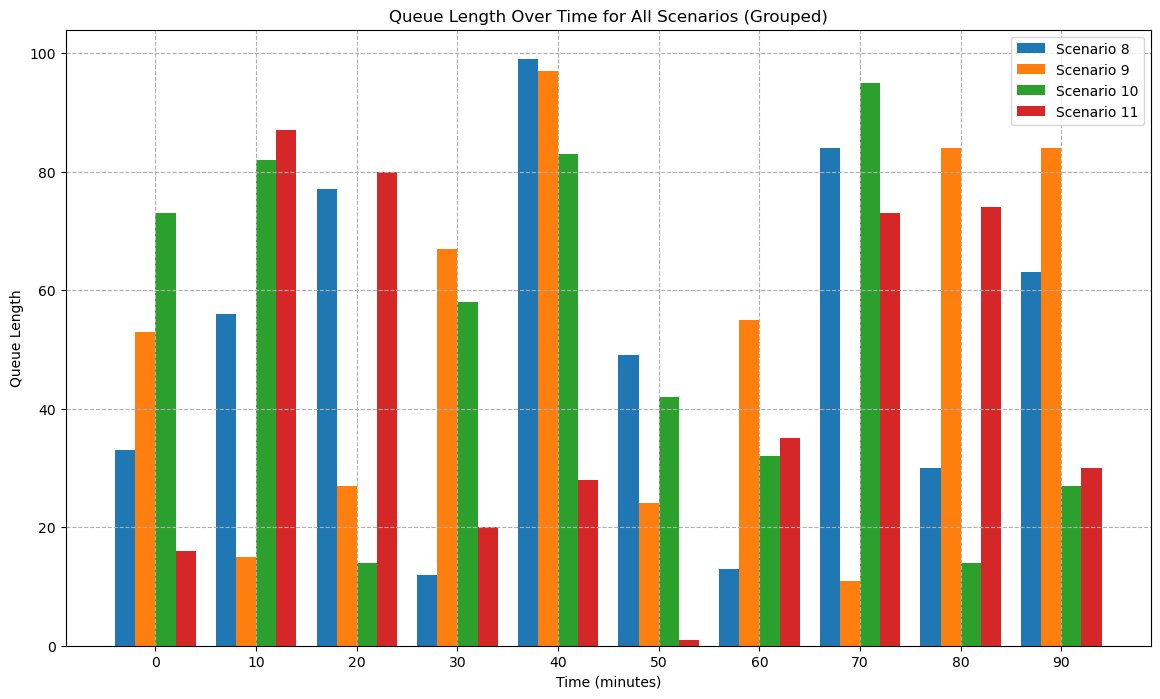

In [40]:
# Generating sample data to simulate 'df_q_react_length' for plotting purposes
time = np.arange(0, 100, 10)  # Time column (same for all scenarios)
data = {
    'time[minutes]': time,
    'queue_preparation_length scenario 8': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 9': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 10': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 11': np.random.randint(0, 100, size=len(time))
}
df_q_react_length = pd.DataFrame(data)

# Prepare data for grouped bar chart
scenarios = [f'queue_preparation_length scenario {i}' for i in range(8,12)]
n_scenarios = len(scenarios)
bar_width = 8 / n_scenarios  # Adjusted for grouped bars

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

for i, scenario in enumerate(scenarios):
    scenario_values = df_q_react_length[scenario]
    ax.bar(time + i * bar_width, scenario_values, width=bar_width, label=f'Scenario {i + 8}')

# Customize plot
ax.set_title('Queue Length Over Time for All Scenarios (Grouped)')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Queue Length')
ax.set_xticks(time + (n_scenarios - 1) * bar_width / 2)
ax.set_xticklabels(time)
ax.legend()
ax.grid(True, linestyle='--', alpha=1)

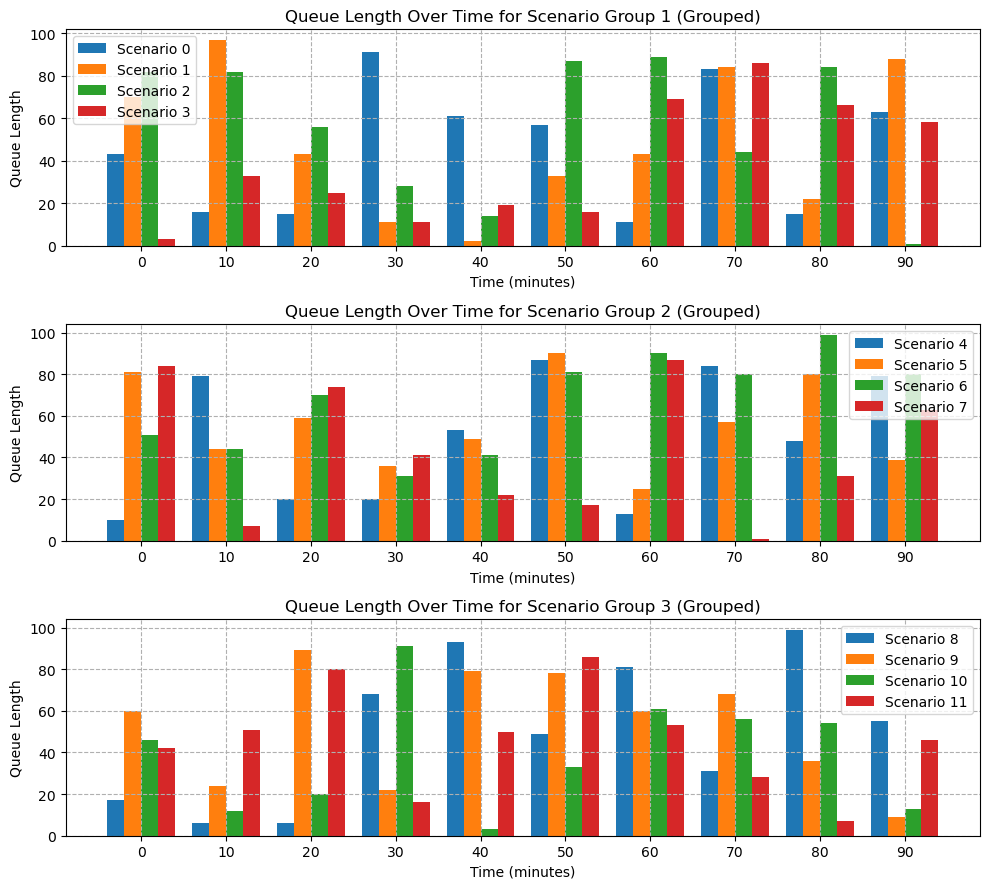

In [42]:
# Generating three sets of sample data to simulate different scenario groups for subplots
time = np.arange(0, 100, 10)  # Time column (same for all scenarios)

# Data for the three scenario groups
data_1 = {
    'time[minutes]': time,
    'queue_preparation_length scenario 0': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 1': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 2': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 3': np.random.randint(0, 100, size=len(time))
}
data_2 = {
    'time[minutes]': time,
    'queue_preparation_length scenario 4': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 5': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 6': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 7': np.random.randint(0, 100, size=len(time))
}
data_3 = {
    'time[minutes]': time,
    'queue_preparation_length scenario 8': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 9': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 10': np.random.randint(0, 100, size=len(time)),
    'queue_preparation_length scenario 11': np.random.randint(0, 100, size=len(time))
}

# Convert data to DataFrames
df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
df_3 = pd.DataFrame(data_3)

# List of DataFrames and scenario groups
dfs = [df_1, df_2, df_3]
scenarios_groups = [
    [f'queue_preparation_length scenario {i}' for i in range(4)],
    [f'queue_preparation_length scenario {i}' for i in range(4, 8)],
    [f'queue_preparation_length scenario {i}' for i in range(8, 12)]
]

# Plot grouped bar charts in subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

for idx, (df, scenarios, ax) in enumerate(zip(dfs, scenarios_groups, axs), start=1):
    n_scenarios = len(scenarios)
    bar_width = 8 / n_scenarios  # Adjusted for grouped bars
    
    for i, scenario in enumerate(scenarios):
        scenario_values = df[scenario]
        ax.bar(time + i * bar_width, scenario_values, width=bar_width, label=f'Scenario {idx * 4 + i - 4}')
    
    # Customize each subplot
    ax.set_title(f'Queue Length Over Time for Scenario Group {idx} (Grouped)')
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Queue Length')
    ax.set_xticks(time + (n_scenarios - 1) * bar_width / 2)
    ax.set_xticklabels(time)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=1)

plt.tight_layout()
plt.show()


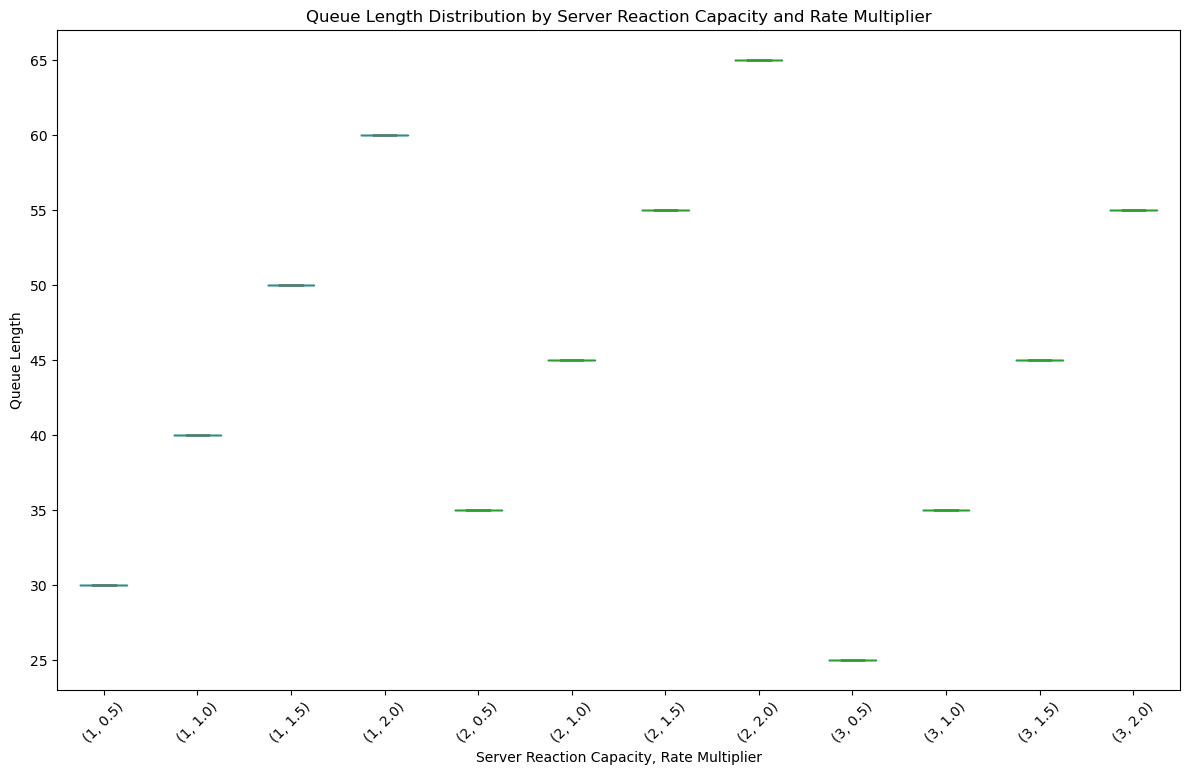

In [45]:

# Creating boxplots for each server_reaction_capacity and rate_multiplier combination
fig, ax = plt.subplots(figsize=(12, 8))

# Generate boxplot data grouped by server_reaction_capacity and rate_multiplier
df_results.boxplot(column='queue_length', by=['server_reaction_capacity', 'rate_multiplier'], ax=ax, grid=False)

# Customizing the plot
ax.set_title('Queue Length Distribution by Server Reaction Capacity and Rate Multiplier')
ax.set_xlabel('Server Reaction Capacity, Rate Multiplier')
ax.set_ylabel('Queue Length')
plt.suptitle('')  # Remove the default title

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


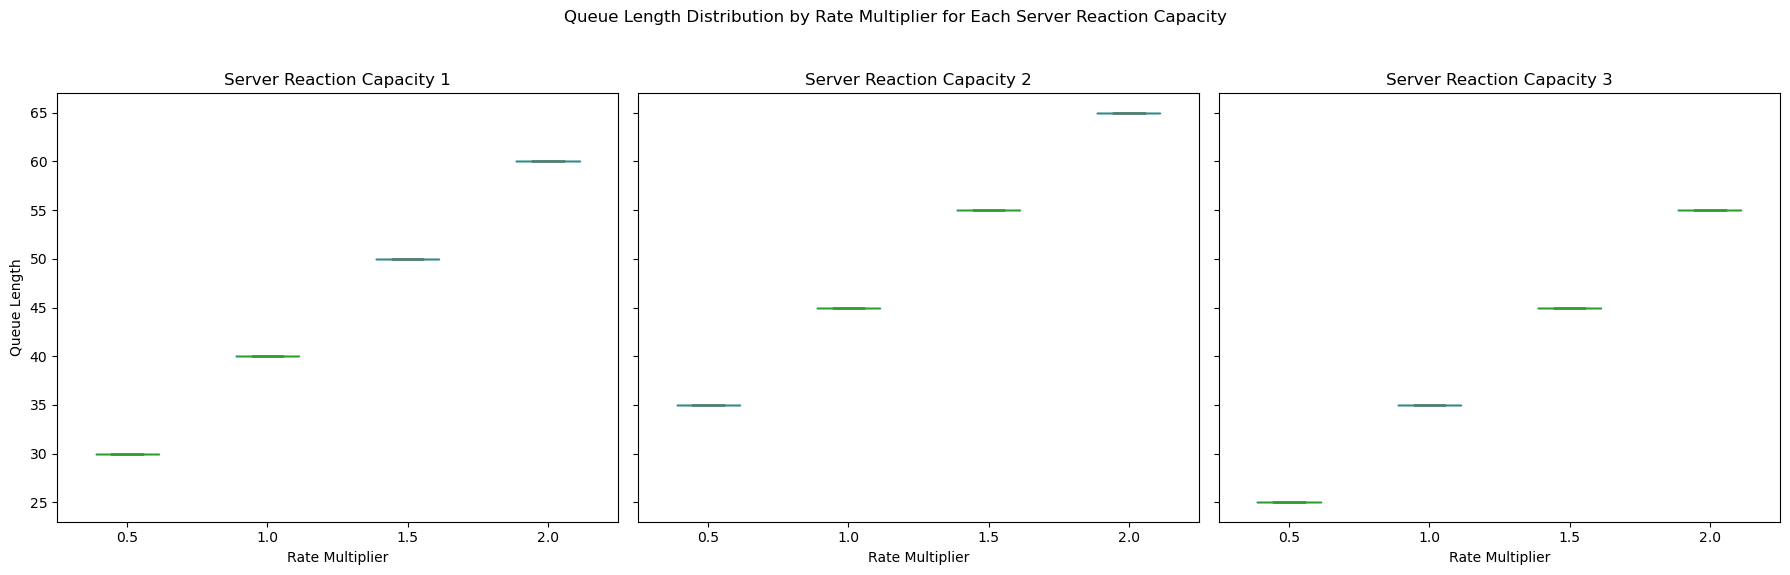

In [46]:

# Creating the subplots for each server_reaction_capacity
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plotting boxplots for each server_reaction_capacity group
for idx, capacity in enumerate(df_results['server_reaction_capacity'].unique()):
    # Filter data for the current capacity
    df_capacity = df_results[df_results['server_reaction_capacity'] == capacity]
    
    # Creating boxplot for the current capacity group
    df_capacity.boxplot(column='queue_length', by='rate_multiplier', ax=axs[idx], grid=False)
    
    # Customizing each subplot
    axs[idx].set_title(f'Server Reaction Capacity {capacity}')
    axs[idx].set_xlabel('Rate Multiplier')
    axs[idx].set_ylabel('Queue Length' if idx == 0 else "")

# Overall title for the figure
plt.suptitle('Queue Length Distribution by Rate Multiplier for Each Server Reaction Capacity')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
plt.show()
